In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import pymongo
import charts
from os import path
from pyecharts import Bar

In [2]:
client = pymongo.MongoClient('localhost',27017)
next_our = client['next_our']
comments = next_our['comments']

In [4]:
for item in comments.find().limit(50):
    print(item)

{'comment_name': 'Magic', '_id': ObjectId('5ae4d0af25149741d834ee2c'), 'comment': '台词矫情的令人发指！', 'votes': 2475}
{'comment_name': '华盛顿樱桃树', '_id': ObjectId('5ae4d0b025149741d834ee2d'), 'comment': '最好的是演员，周冬雨完全开辟出自己的戏路。小井进步惊人，已长出美丽。最差的是编剧，没有一场完全连贯的戏，几乎都是攒的。', 'votes': 2230}
{'comment_name': '痴痴的钟灵', '_id': ObjectId('5ae4d0b125149741d834ee2e'), 'comment': '希望奶茶好好演戏唱歌🙏🏻矫情的青春片已经没有市场了。吃完瓜回来，劝🐱眼善良🙃中国的电影市场要被你们搞的烂透了。在工作日首日票房近3亿，把自己当妇联了么🙃【把没有市场收回，有🐱眼在何愁没有100亿🙃', 'votes': 1784}
{'comment_name': '昵称过期作废', '_id': ObjectId('5ae4d0b125149741d834ee2f'), 'comment': '毫无看点可言。剧情处处是硬伤！这是电影吗？这是PPT，刘小姐，还是回去唱歌吧。', 'votes': 1785}
{'comment_name': '末药煎肉塔', '_id': ObjectId('5ae4d0b225149741d834ee30'), 'comment': '现在还把北京设定为梦想之城的，大概受众也是瞄准了小镇青年吧（多次冲北京喊话真是挺尴尬的）。剧情拖太长，唯一的泪点还是田壮壮演的老爸，周冬雨老演这种角色不会腻吗？', 'votes': 1601}
{'comment_name': 'xiaoning', '_id': ObjectId('5ae4d0b225149741d834ee31'), 'comment': '真的很讨厌卖情怀的电影，而且还有一个不是很有才华的歌手做导演，要不是主题曲我应该都不会想看。（留言说我收钱黑的，老子收了一分黑钱我多的钱都亏出去行了吧，就这尴尬的台词乱拼凑的故事是在看ppt吗还用收钱黑，我真是谢你们大爷了，你不用管我觉得谁有

In [3]:
comment_list=[]
for item in comments.find():
    comment_list.append(item['comment'])
print(len(comment_list))

480


In [4]:
sep = '\n'
fl=open('comment_list.txt', 'w',encoding='utf-8')
fl.write(sep.join(comment_list))
fl.close()

In [5]:
text=open('comment_list.txt', 'r',encoding='utf-8')
mytext=text.read()

In [6]:
cut = jieba.cut(mytext,cut_all=True)

In [7]:
split_cut ='/'.join(cut)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\兴东\AppData\Local\Temp\jieba.cache
Loading model cost 4.406 seconds.
Prefix dict has been built succesfully.


In [14]:
wc = WordCloud(background_color = "white", #设置背景颜色  
               #mask = "图片",  #设置背景图片  
               max_words = 2000, #设置最大显示的字数  
               margin=5,
               font_path="C:\\Windows\\Fonts\\STFANGSO.ttf",#不加这一句显示口字形乱码
#                mask=backgroud_Image,
               #stopwords = "", #设置停用词  
#                font_path = "fangsong_GB2312.ttf",  
        #设置中文字体，使得词云可以显示（词云默认字体是“DroidSansMono.ttf字体库”，不支持中文）  
               max_font_size = 80,  #设置字体最大值  
               random_state = 40, #设置有多少种随机生成状态，即有多少种配色方案  
    )  

In [15]:
mword =wc.generate(split_cut)

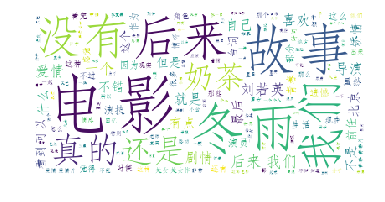

In [16]:
plt.imshow(mword)
# plt.figure()
plt.axis("off")
plt.show()

In [17]:
d = path.dirname("D:\\pycharm\\PycharmProjects\\next_our\\our.jpg")
wc.to_file(path.join(d, "next.jpg"))
print('生成词云成功!')

生成词云成功!


In [22]:
backgroud_Image = plt.imread('D:\\pycharm\\PycharmProjects\\next_our\\our.jpg')

In [18]:
vote_list=[]
comment_name=[]
for item in comments.find():
    vote_list.append(item['votes'])
    comment_name.append(item['comment_name'])
print(len(vote_list))
print(len(comment_name))

480
480


In [42]:
print(vote_list)

[2475, 2230, 1784, 1785, 1601, 1373, 1508, 1238, 1146, 995, 1027, 748, 758, 654, 977, 478, 636, 567, 505, 737, 497, 359, 382, 244, 506, 327, 214, 398, 275, 233, 600, 189, 298, 154, 251, 221, 196, 204, 247, 104, 130, 194, 256, 239, 178, 170, 167, 101, 164, 162, 78, 195, 56, 167, 122, 159, 94, 70, 55, 73, 35, 124, 45, 30, 51, 63, 73, 44, 47, 40, 47, 65, 41, 100, 15, 51, 89, 48, 29, 78, 116, 67, 164, 79, 29, 47, 28, 49, 55, 28, 73, 19, 109, 82, 45, 66, 63, 20, 25, 19, 56, 26, 29, 70, 65, 86, 47, 37, 40, 22, 28, 71, 59, 56, 53, 29, 80, 66, 73, 27, 64, 25, 23, 17, 26, 29, 63, 45, 9, 59, 87, 14, 12, 16, 63, 41, 83, 7, 25, 24, 8, 15, 44, 57, 63, 16, 6, 45, 5, 50, 22, 5, 30, 22, 4, 41, 73, 16, 27, 25, 65, 18, 55, 33, 18, 15, 16, 27, 6, 55, 9, 16, 10, 42, 17, 39, 2, 41, 11, 34, 4, 11, 19, 2, 45, 5, 28, 20, 52, 13, 14, 30, 12, 6, 6, 6, 65, 62, 49, 34, 23, 40, 34, 38, 13, 2, 46, 5, 41, 15, 37, 17, 81, 4, 8, 16, 4, 29, 11, 25, 8, 12, 3, 54, 31, 1, 20, 2, 16, 22, 13, 9, 45, 11, 40, 2, 0, 33, 24, 9,

In [26]:
series =[
    {
    'name':'评论点赞数',
    'data':[i for i in vote_list],
    'type':'column'
    }
]
charts.plot(series,show='inline',options=dict(title=dict(text='评论点赞数')))

In [23]:
print(comment_name)

['Magic', '华盛顿樱桃树', '痴痴的钟灵', '昵称过期作废', '末药煎肉塔', 'xiaoning', '张无B', '葡萄猪不爱睡觉', '糖炒荔枝', '尼克Lui', '一口吃掉小蛋糕', '一一', '好青年bobo', '呼叫G2', '影志', '俏皮面', '_______喂丶', '刘三姐不好死', 'Lalio', '陆支羽', '维维', 'Melody', 'Your MR.R', 'moli', '帽子', '基闹', '哪吒男', '有匪君子', 'Ka0015', '法兰西胶片', 'uncanny1993', '茶不思', '无耻不混蛋', '凌睿大坏蛋', '纤手破新橙', '汤川影业', '瓜-茜-茜', 'LOOK', '夏蝉x', '大奇特(Grinch)', '无声胜有声', '盲忙', '菲菲不停问我', '崔汀', 'S@m', '浪裡個狼', 'ck', '郁闷的天空', '牧羊女孩', '金马影帝冯小刚', '樹', '青葱无觅', '王大根', '锐利修蕊', '乌鸦火堂', '小烨', '巧克力🍫', 'drmfslxd', '5863177', '三水涵', '梁慕橙', '呐呐', '喜多川Johnny', '洪美丽', 'huilin0815', 'will', 'Luc', '威锐', '武侠小王子', '多啦小桃', '森', '杨清宇', '李白', '天涯过客', '欢乐分裂', '反正都是禽兽', '突然粉碎', '我就不喝纯牛奶', 'MR.wu', 'reneyoyo', '努力减肥的girl', 'Jetevois', 'Cool.酷儿', '不一样的盗草人', '乔息', '承泽明', '叮克铃', 'Lemons', '我萱你', '功夫查理', '梅山君', 'draco', '琉彦YOUNG', 'Anita 煎酿三婶', '姬月梅', '钱紧', '顾羲', '宋歌', 'monica喵', '男娼起义', 'Gabriel', 'Flyer', '追风筝的人', '阳光美丽ff', '唐朝', '豆瓣豆瓣酱', '静待花开', '宋祖儿', '已注销', '康报虹', '冰零9955', '粗暴的黄瓜君', 'wuh', '小熙看世界', '风信子', '会飞的猫'

In [25]:
bar = Bar("热评中点赞数示例图")
bar.add( "点赞数",comment_name, vote_list, is_stack=True,mark_line=["min", "max"],mark_point=["average"])
bar.show_config()
bar.render()

{
    "tooltip": {
        "textStyle": {
            "color": "#fff",
            "fontSize": 14
        },
        "borderColor": "#333",
        "axisPointer": {
            "type": "line"
        },
        "backgroundColor": "rgba(50,50,50,0.7)",
        "borderWidth": 0,
        "triggerOn": "mousemove|click",
        "formatter": null,
        "trigger": "item"
    },
    "toolbox": {
        "feature": {
            "saveAsImage": {
                "show": true,
                "title": "\u4e0b\u8f7d\u56fe\u7247"
            },
            "dataView": {
                "show": true
            },
            "restore": {
                "show": true
            }
        },
        "top": "center",
        "show": true,
        "orient": "vertical",
        "left": "95%"
    },
    "color": [
        "#c23531",
        "#2f4554",
        "#61a0a8",
        "#d48265",
        "#749f83",
        "#ca8622",
        "#bda29a",
        "#6e7074",
        "#546570",
        "#c4ccd3"

----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 60613)
----------------------------------------


Traceback (most recent call last):
  File "c:\python35\lib\socketserver.py", line 313, in _handle_request_noblock
    self.process_request(request, client_address)
  File "c:\python35\lib\socketserver.py", line 341, in process_request
    self.finish_request(request, client_address)
  File "c:\python35\lib\socketserver.py", line 354, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "c:\python35\lib\site-packages\charts\server.py", line 16, in __init__
    SimpleHTTPServer.SimpleHTTPRequestHandler.__init__(self, request, client_address, server)
  File "c:\python35\lib\socketserver.py", line 681, in __init__
    self.handle()
  File "c:\python35\lib\http\server.py", line 422, in handle
    self.handle_one_request()
  File "c:\python35\lib\http\server.py", line 410, in handle_one_request
    method()
  File "c:\python35\lib\site-packages\charts\server.py", line 20, in do_POST
    content_len = int(self.headers.getheader('content-length', 0))
AttributeEr